# Competition

As a programmer, I prefer to use script files over notebooks. That's why I utilized .py scripts in this folder to model the problem with various algorithms like XGBoost, SVM, Voting, etc. To demonstrate the results, I use this notebook to show the simplest steps in this project, such as reading the data, transforming it, removing outliers, and finally, utilizing the trained models to display the results at the end of the project. You will see that ensemble of models performs better than individual models (as it should be)...

In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Analysis

In [2]:
df_origin = pd.read_csv('../Data/train.csv')
df = df_origin.copy()
df.shape

(11988, 13)

In [3]:
df.columns, len(df.columns)

(Index(['id', 'age', 'gender', 'height_cm', 'weight_kg', 'body fat_%',
        'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm',
        'sit-ups counts', 'broad jump_cm', 'class'],
       dtype='object'),
 13)

The dependent variable is balanced

In [4]:
df['class'].value_counts()

C    3003
B    3002
D    2995
A    2988
Name: class, dtype: int64

I see non NA values<br>
And some features as objects that can be transformed to categories

In [5]:
for c in df.select_dtypes('object').columns:
    df[c] = df[c].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11988 entries, 0 to 11987
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       11988 non-null  int64   
 1   age                      11988 non-null  float64 
 2   gender                   11988 non-null  category
 3   height_cm                11988 non-null  float64 
 4   weight_kg                11988 non-null  float64 
 5   body fat_%               11988 non-null  float64 
 6   diastolic                11988 non-null  float64 
 7   systolic                 11988 non-null  float64 
 8   gripForce                11988 non-null  float64 
 9   sit and bend forward_cm  11988 non-null  float64 
 10  sit-ups counts           11988 non-null  float64 
 11  broad jump_cm            11988 non-null  float64 
 12  class                    11988 non-null  category
dtypes: category(2), float64(10), int64(1)
memory usage: 1.0 MB


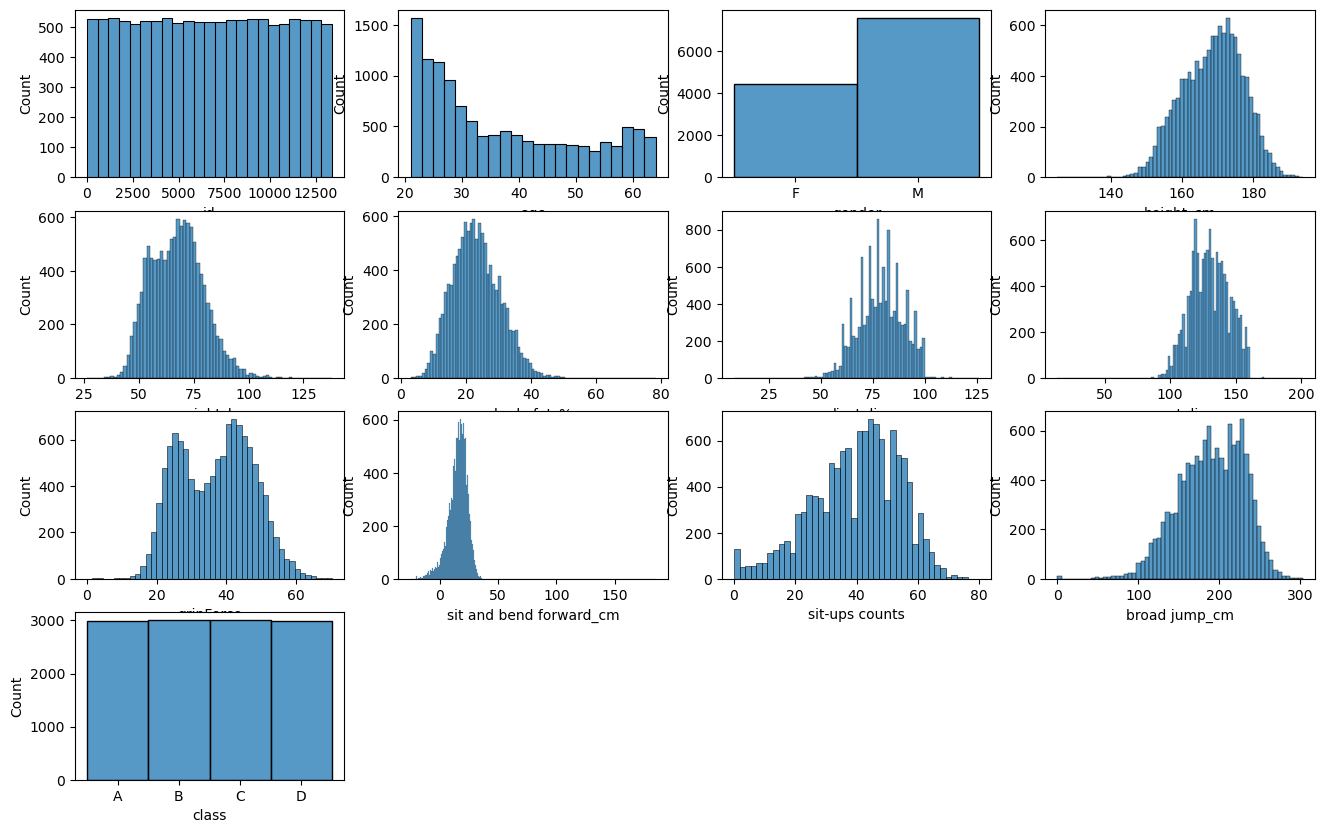

In [6]:
plt.figure (figsize=(16,10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column])

Check the feature independece between them

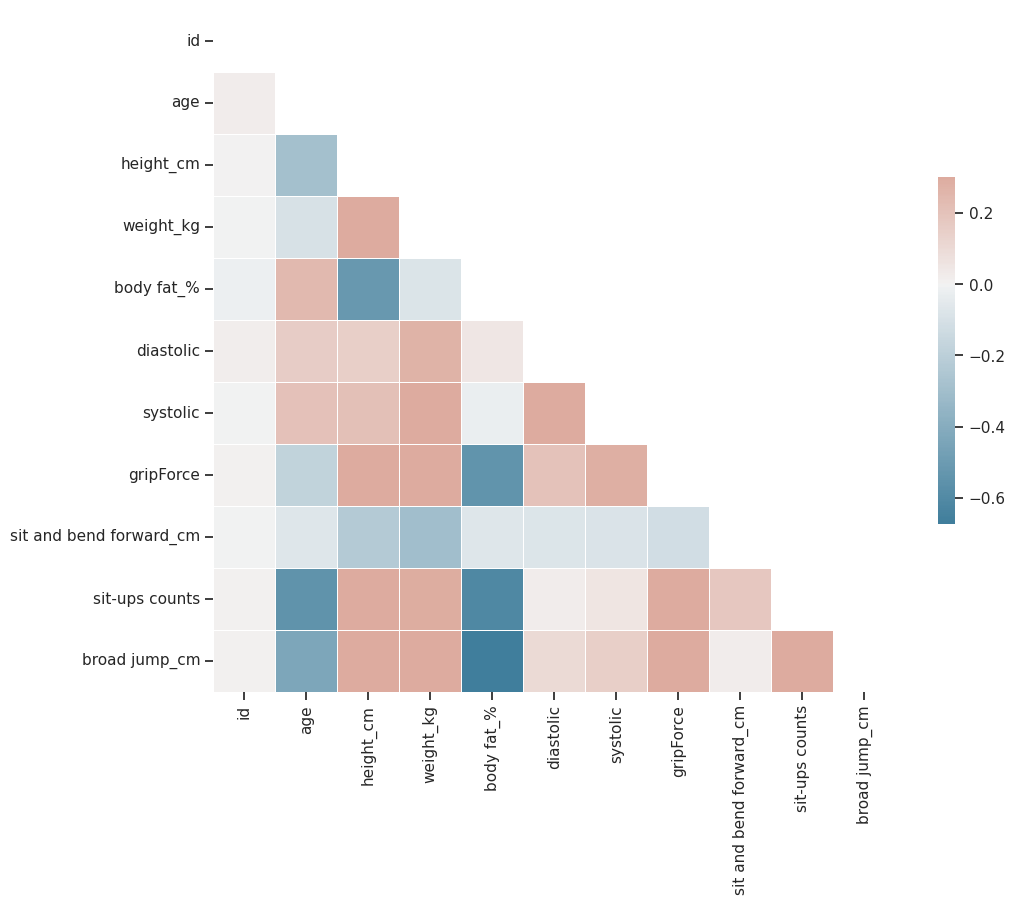

In [7]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Remove outliers

In [8]:
def print_boxplot_grid(df):
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    i = 0
    for c in df.columns:
        if (df[c].dtype == 'category'):
            continue
        ax = fig.add_subplot(4, 4, i + 1)
        sns.boxplot(data=df, y='class', x=c, ax=ax)
        i += 1
    fig.set_size_inches(12, 8)
    plt.show()

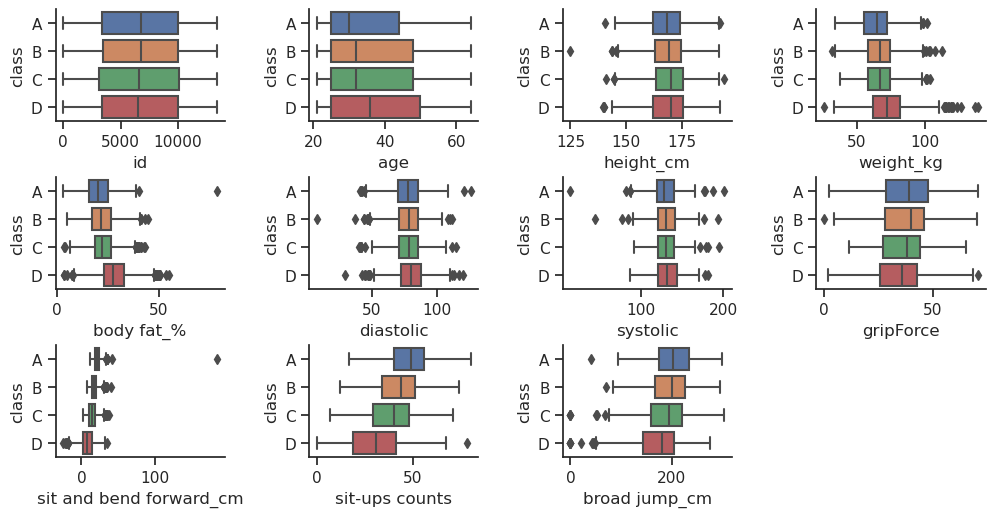

In [9]:
print_boxplot_grid(df)

### Body fat % outlier

Drop gordos...
        id   age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
5005  736  21.0      M      177.6       74.5        78.4       69.0     122.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
5005       44.9                     26.1            59.0          235.0     A  


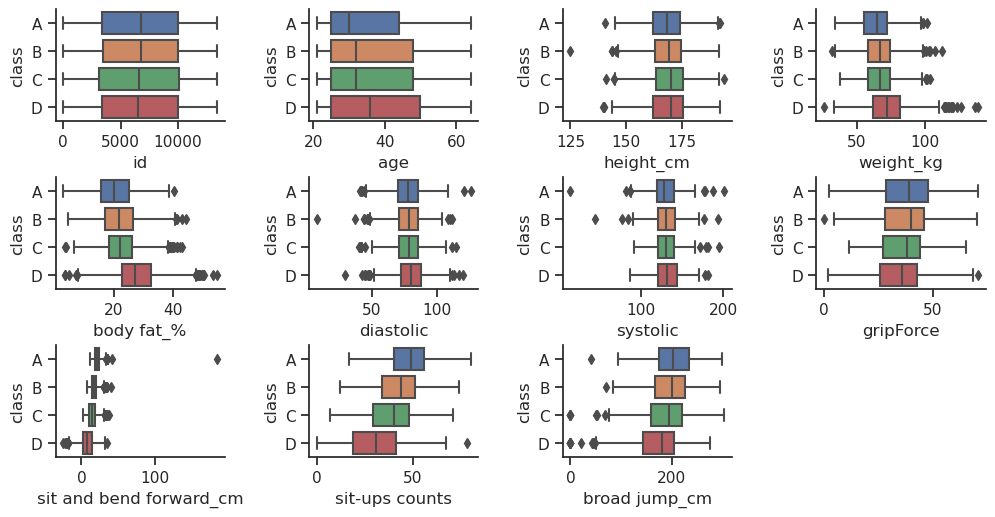

In [10]:
idx = df[(df['class'] == 'A') & (df['body fat_%'] > 50)].index
print('Drop gordos...\n', df.iloc[idx, :])
df = df.drop(index=idx)
print_boxplot_grid(df)
df = df.reset_index(drop=True)

### Heigh cm outlier

Drop bajos...
         id   age gender  height_cm  weight_kg  body fat_%  diastolic  \
8274  8252  56.0      F      125.0       34.4        39.2       69.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
8274     125.0       12.6                     17.0            27.0   

      broad jump_cm class  
8274          109.0     B  


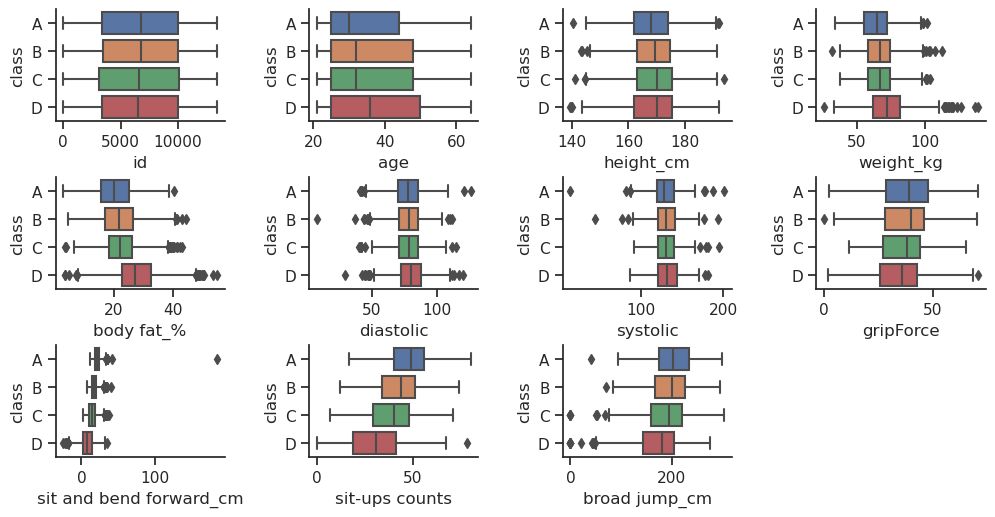

In [11]:
idx = df[(df['class'] == 'B') & (df['height_cm'] < 140)].index
print('Drop bajos...\n', df.iloc[idx, :])
df = df.drop(index=idx)
print_boxplot_grid(df)
df = df.reset_index(drop=True)

#### Sit and bend forward_cm

Drop elasticos...
         id   age gender  height_cm  weight_kg  body fat_%  diastolic  \
9746  3356  45.0      M      164.4       64.4        24.3       96.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
9746     142.0       38.5                    185.0            44.0   

      broad jump_cm class  
9746          223.0     A  


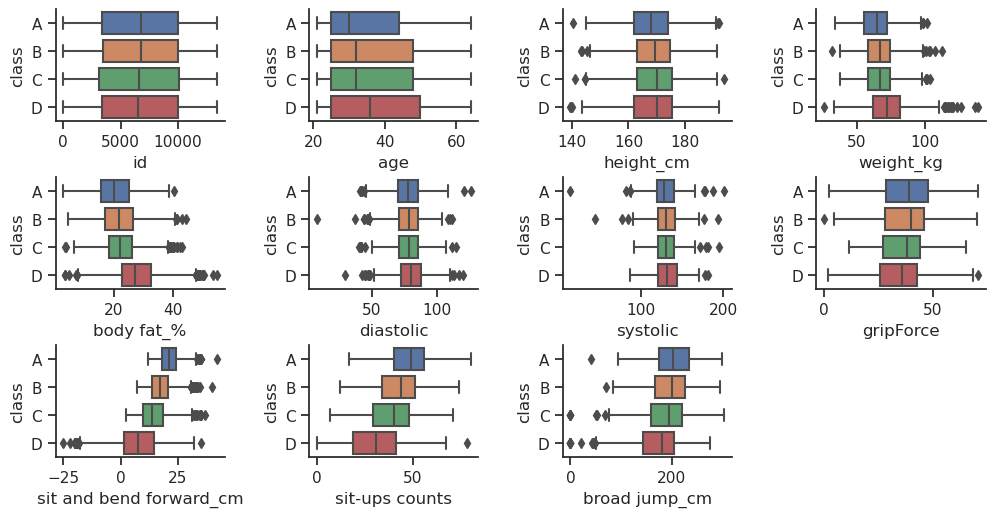

In [12]:
idx = df[(df['class'] == 'A') & (df['sit and bend forward_cm'] > 100)].index
print('Drop elasticos...\n', df.iloc[idx, :])
df = df.drop(index=idx)
print_boxplot_grid(df)
df = df.reset_index(drop=True)

### Systolic

In [13]:
idx = df[(df['class'] == 'A') & (df['systolic'] < 70)].index
print('Drop systoloc?...\n', df.iloc[idx, :])
df = df.drop(index=idx)
df = df.reset_index(drop=True)

Drop systoloc?...
         id   age gender  height_cm  weight_kg  body fat_%  diastolic  \
8011  7598  30.0      M      166.6      66.08        14.4       67.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
8011      14.0       53.8                     17.2            57.0   

      broad jump_cm class  
8011          221.0     A  


In [14]:
idx = df[(df['class'] == 'A') & (df['systolic'] > 190)].index
print('Drop systoloc?...\n', df.iloc[idx, :])
df = df.drop(index=idx)
df = df.reset_index(drop=True)

Drop systoloc?...
         id   age gender  height_cm  weight_kg  body fat_%  diastolic  \
7720  8533  60.0      M      169.4      77.54        25.4      126.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
7720     201.0       48.7                     14.5            38.0   

      broad jump_cm class  
7720          194.0     A  


In [15]:
idx = df[(df['class'] == 'B') & (df['systolic'] < 70)].index
print('Drop systoloc?...\n', df.iloc[idx, :])
df = df.drop(index=idx)
df = df.reset_index(drop=True)

Drop systoloc?...
         id   age gender  height_cm  weight_kg  body fat_%  diastolic  \
8076  8218  31.0      M      176.7      80.32        20.8       46.2   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
8076      43.9       43.9                     17.2            57.0   

      broad jump_cm class  
8076          221.0     B  


In [16]:
idx = df[(df['class'] == 'B') & (df['systolic'] > 190)].index
print('Drop systoloc?...\n', df.iloc[idx, :])
df = df.drop(index=idx)
df = df.reset_index(drop=True)

Drop systoloc?...
          id   age gender  height_cm  weight_kg  body fat_%  diastolic  \
4965  13245  57.0      M      178.1       84.5        22.6      102.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
4965     193.0       47.8                     20.4            40.0   

      broad jump_cm class  
4965          221.0     B  


In [17]:
idx = df[(df['class'] == 'C') & (df['systolic'] > 190)].index
print('Drop systoloc?...\n', df.iloc[idx, :])
df = df.drop(index=idx)
df = df.reset_index(drop=True)

Drop systoloc?...
         id   age gender  height_cm  weight_kg  body fat_%  diastolic  \
2858  1221  63.0      M      166.9       56.3        24.6      101.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
2858     195.0       35.5                     15.8            23.0   

      broad jump_cm class  
2858          161.0     C  


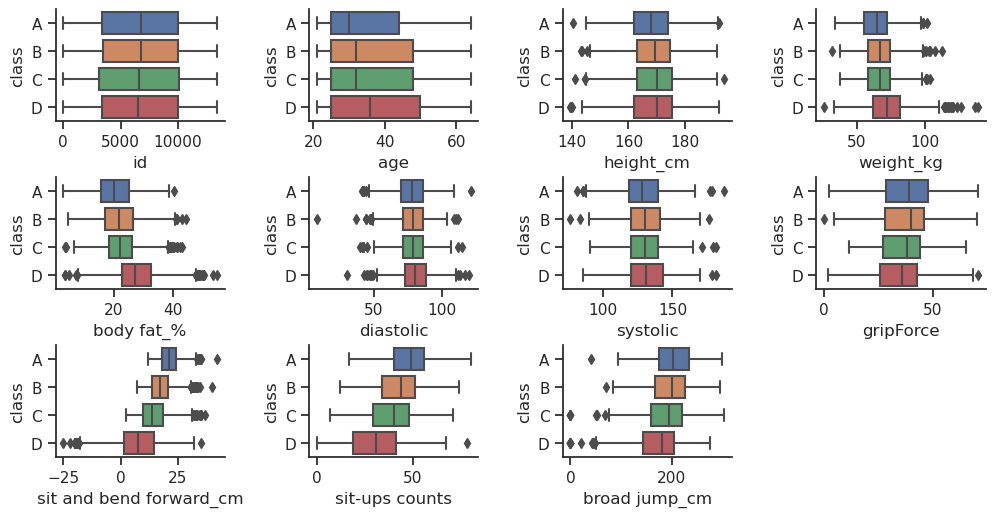

In [18]:
print_boxplot_grid(df)

### Diastolic

In [19]:
idx = df[(df['class'] == 'B') & (df['diastolic'] < 30)].index
print('Drop diastolic?...\n', df.iloc[idx, :])
df = df.drop(index=idx)
df = df.reset_index(drop=True)

Drop diastolic?...
        id   age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
1872  337  35.0      M      173.1       77.6        22.8        8.0     122.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
1872       46.4                     16.7            47.0          216.0     B  


In [20]:
idx = df[(df['class'] == 'D') & (df['diastolic'] < 40)].index
print('Drop diastolic?...\n', df.iloc[idx, :])
df = df.drop(index=idx)
df = df.reset_index(drop=True)

Drop diastolic?...
         id   age gender  height_cm  weight_kg  body fat_%  diastolic  \
8272  6787  22.0      F      164.1       60.8        32.4       30.0   

      systolic  gripForce  sit and bend forward_cm  sit-ups counts  \
8272     122.0       29.7                     -4.6            31.0   

      broad jump_cm class  
8272          159.0     D  


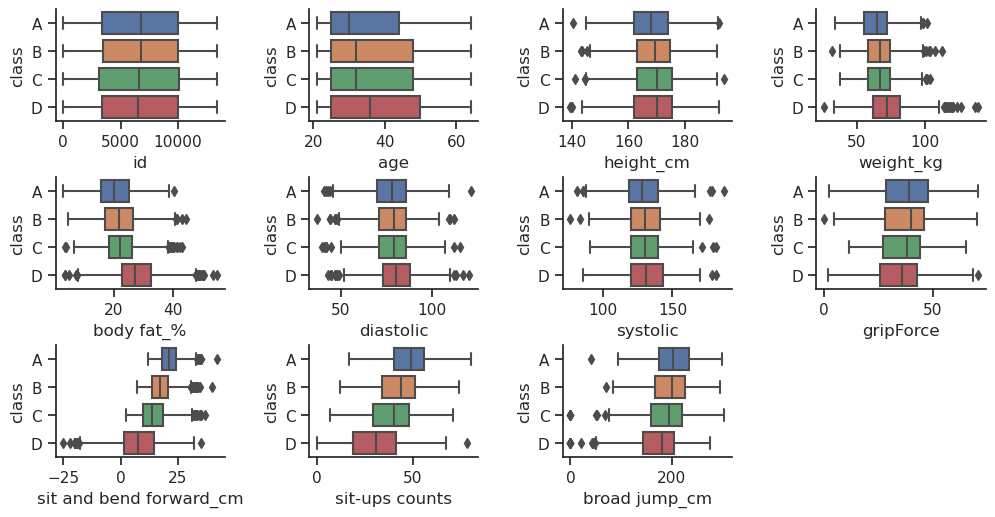

In [21]:
print_boxplot_grid(df)

In [22]:
df.shape

(11978, 13)

## Drop columns

The id identifies the entry, so can be removed

In [23]:
len(df['id'].unique()) == df.shape[0]

True

In [24]:
df = df.drop('id', axis=1, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11978 entries, 0 to 11977
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      11978 non-null  float64 
 1   gender                   11978 non-null  category
 2   height_cm                11978 non-null  float64 
 3   weight_kg                11978 non-null  float64 
 4   body fat_%               11978 non-null  float64 
 5   diastolic                11978 non-null  float64 
 6   systolic                 11978 non-null  float64 
 7   gripForce                11978 non-null  float64 
 8   sit and bend forward_cm  11978 non-null  float64 
 9   sit-ups counts           11978 non-null  float64 
 10  broad jump_cm            11978 non-null  float64 
 11  class                    11978 non-null  category
dtypes: category(2), float64(10)
memory usage: 959.6 KB


PSS. transform categorical dependent variable into numbers

In [25]:
X = df.drop('class', axis=1, errors='ignore')
gender = X['gender']
gender_ohc = OneHotEncoder(drop='first')
gender = gender_ohc.fit_transform(gender.values.reshape(-1, 1))
X['man'] = pd.Series(gender.toarray().squeeze())
X = X.drop('gender', axis=1, errors='ignore')

In [26]:
X.tail()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,man
11973,50.0,162.1,59.6,32.6,94.0,136.0,27.9,3.5,23.0,149.0,0.0
11974,50.0,161.2,52.1,25.1,61.0,112.0,27.0,21.7,24.0,145.0,0.0
11975,24.0,167.7,68.9,22.7,73.0,124.0,38.4,17.6,44.0,212.0,1.0
11976,29.0,176.2,72.2,17.5,73.0,130.0,46.1,15.4,60.0,239.0,1.0
11977,61.0,156.3,58.3,35.6,67.0,142.0,21.5,26.6,23.0,132.0,0.0


In [27]:
y = df['class']
le = preprocessing.LabelEncoder()
y = pd.Series(le.fit_transform(y))

In [28]:
y.tail()

11973    3
11974    0
11975    2
11976    1
11977    0
dtype: int64

## Feature engineering

In [29]:
# ref idea: https://en.wikipedia.org/wiki/Lean_body_mass

body_fat = df['body fat_%'] / 100
height_m = df['height_cm'] / 100
lean_mass = df['weight_kg'] * (1-body_fat)

# X['lean_bmi'] = (lean_mass / height_m**2).round(2) <- ain't work for me...

Save data as preprocessed file

In [30]:
from sklearn.preprocessing import StandardScaler

preprocessed = X.copy()
preprocessed['man'] = preprocessed['man'].astype('int')
preprocessed.tail()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,man
11973,50.0,162.1,59.6,32.6,94.0,136.0,27.9,3.5,23.0,149.0,0
11974,50.0,161.2,52.1,25.1,61.0,112.0,27.0,21.7,24.0,145.0,0
11975,24.0,167.7,68.9,22.7,73.0,124.0,38.4,17.6,44.0,212.0,1
11976,29.0,176.2,72.2,17.5,73.0,130.0,46.1,15.4,60.0,239.0,1
11977,61.0,156.3,58.3,35.6,67.0,142.0,21.5,26.6,23.0,132.0,0


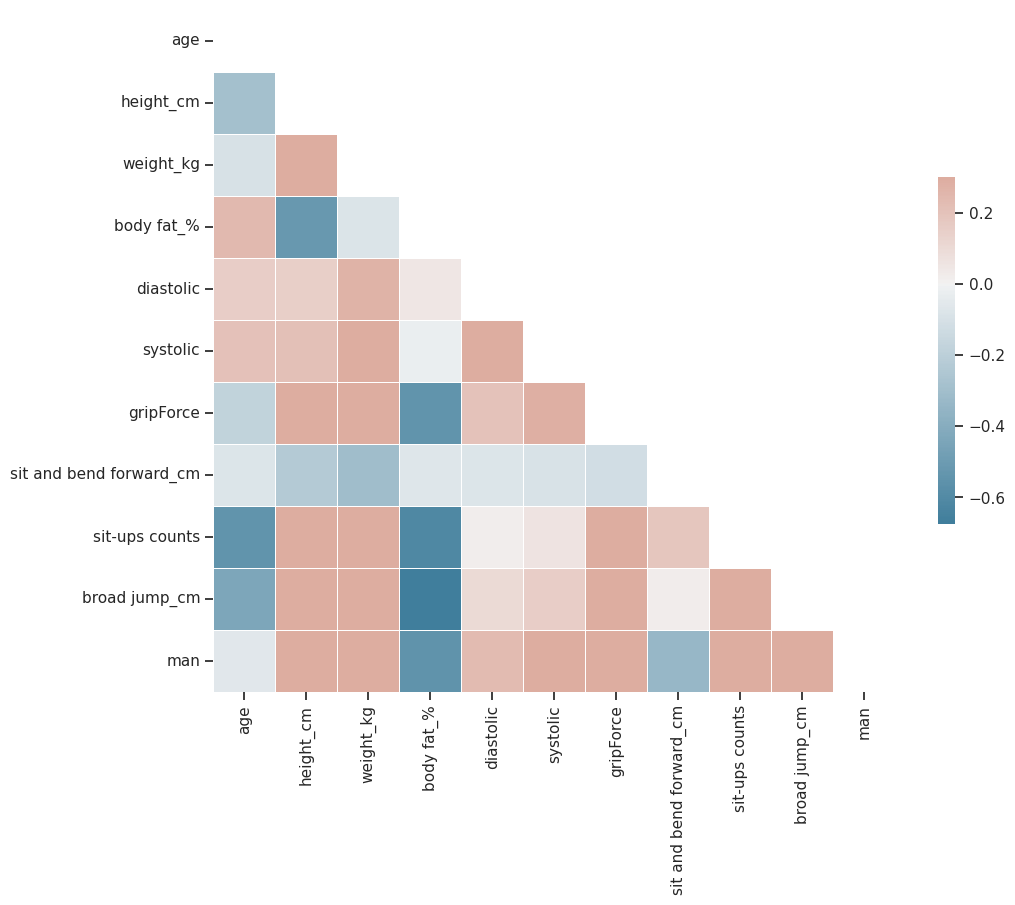

In [31]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

corr = preprocessed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Save preprocessed data to be used in models

In [32]:
preprocessed['class'] = y.copy()
preprocessed.to_csv('../Data/preprocessed.csv', index=False)
preprocessed.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,man,class
0,26.0,165.8,65.0,25.0,94.0,148.0,31.4,4.0,47.0,187.0,1,3
1,27.0,169.6,64.1,9.4,80.0,130.0,37.8,30.5,53.0,251.0,1,1
2,36.0,176.8,106.6,36.8,90.0,144.0,49.3,13.9,25.0,160.0,1,3
3,62.0,170.5,75.8,27.4,92.0,159.0,33.4,12.4,32.0,177.0,1,1
4,24.0,171.0,75.6,25.5,92.0,145.0,36.8,-11.4,36.0,190.0,1,3


## Models results

In [33]:
from Util import find_files, path_to_uuid
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', None)

df = pd.read_csv('../Data/preprocessed.csv')
X = df.drop('class', axis=1)
y = df['class']

X.shape, y.shape
dirname = '../Model'

# giving file extension
ext = ('.pickle', '.pkl')

pickles = find_files(dirname, ext)

P = {}

for p in pickles:
    if p.exists():
        with open(p, "rb") as f:
            P[path_to_uuid(p)] = pickle.load(f)

models = []
scores = []

for uuid, model in P.items():

    if hasattr(model, 'best_estimator_'):
        predictor = model.best_estimator_
    else:
        predictor = model

    columns = X.columns

    X_model = X[columns]

    _, X_test, _, y_test = train_test_split(
        X_model, y, random_state=42, test_size=0.2, stratify=y)

    y_pred = predictor.predict(X_test)

    models.append(uuid)
    model_report = pd.DataFrame(
        classification_report(y_test, y_pred, output_dict=True))
    scores.append(model.score(X_test, y_test))

In [51]:
models_data = pd.DataFrame (
    {
        'model': models,
        'score': scores
    }
)
models_data = models_data.sort_values('score', ascending=False)
models_data.head(25)

,model,score
9,Voting/Voting_LGBMClassifier-model02_LGBMClass...,0.768364
24,Voting/Voting_LGBMClassifier-model01_LGBMClass...,0.768364
10,Voting/Voting_LGBMClassifier-model01_LGBMClass...,0.767529
23,Voting/Voting_LGBMClassifier-model02_SVM-model...,0.767112
18,Voting/Voting_LGBMClassifier-model01_SVM-model...,0.767112
30,Voting/Voting_LGBMClassifier-model03_SVM-model...,0.767112
32,Voting/Voting_LGBMClassifier-model01_LGBMClass...,0.766694
26,Voting/Voting_LGBMClassifier-model01_SVM-model...,0.766277
20,Voting/Voting_LGBMClassifier-model01_SVM-model...,0.766277
12,Voting/Voting_LGBMClassifier-model02_SVM-model...,0.766277
